## Données :
**Dans ce projet, vous travaillez pour une Banque vous demandant d’élaborer un outil automatisant le
process d’octroi de crédit à ses futurs clients. La banque dispose d’un historique des crédits effectués
par ses clients, avec des informations personnelles sur le client et s’il a fait défaut ou non pendant la
période de remboursement du crédit. Les données contiennent les informations ci-dessous :**
- *SK_ID_CURR* : identifiant du client
- *GOOD_PAYER* : 1 s’il n’y a pas eu de retard de remboursement, 0 sinon
- *CODE_GENDER* : le genre du client
- *FLAG_OWN_CAR* : le client possède une voiture
- *FLAG_OWN_REALTY* : le client est propriétaire
- *CNT_CHILDREN* : nombre d’enfant du client
- *AMT_INCOME_TOTAL* : les revenus du client
- *AMT_CREDIT* : le montant du crédit
- *AMT_GOODS_PRICE* : le montant du produit pour lequel le crédit a été pris
- *NAME_INCOME_TYPE* : le type de revenus du client
- *NAME_EDUCATION_TYPE* : niveau académique du client
- *NAME_FAMILY_STATUS*: status familial du client
- *NAME_CONTRACT_TYPE*: crédit comptant ou en revolving
- *NAME_HOUSING_TYPE*: situation habitat
- *TOTALAREA_MODE*: surface normalisée d’habitation
- *DAYS_BIRTH*: Age du client
- *DAYS_EMPLOYED* : nombre d’année consécutif du dernier emploi du client
- *OCCUPATION_TYPE* : profession du client
- *ORGANIZATION_TYPE* : secteur d’emploi
- *EXT_SOURCE_1* : score de crédit bureau 1
- *EXT_SOURCE_2* : score de crédit bureau 2
- *EXT_SOURCE_3* : score de crédit bureau 3
- *AMT_REQ_CREDIT_BUREAU_YEAR*: nombre de demande de crédit effectué par le client
dans l’année précédente

### Objectifs 1 : analyser les données dans le but de décrire le portfolio des clients pour la Banque
- Analyse univariée et bivariée :
- Moyenne, médiane, quartile, comptage
- Corrélation : variables explicatives et la variable cible (anova, pearson)
- Distribution des variables (ex : kurtosis, distribution normal)
- Analyse des valeurs extrêmes / aberrantes (ex : Interquartile Range Method)

### Traitement des valeurs manquantes
- Taux de risque / %BP et %MP selon les modalités (Analyse Marginale)
Visualisation des données : boxplot, histogramme, piechart, nuage de point
- Calcul de métrique d’importances des variables :
- WOE, IV, GINI
- Test de significativité

--- Analyse pour la variable : CNT_CHILDREN ---
 - Moyenne : 0.4170517477423572
 - Écart-type : 0.7221213844376252
0    0
1    0
2    0
3    0
4    0
Name: CNT_CHILDREN, dtype: int64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


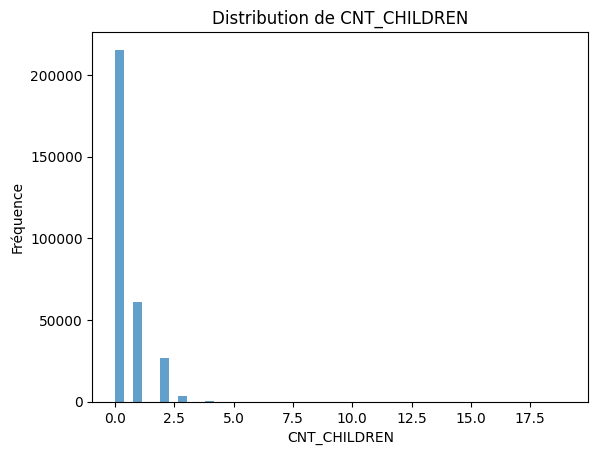

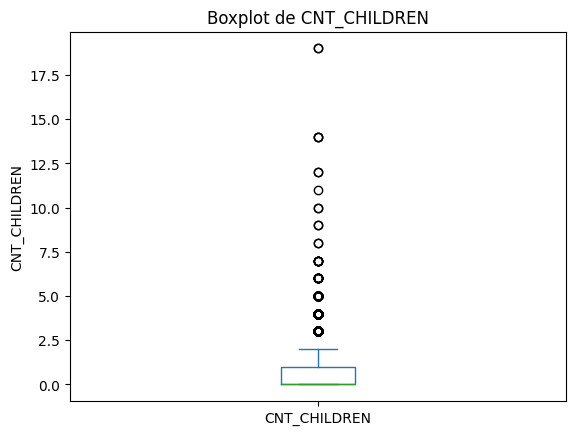

--- Analyse pour la variable : AMT_INCOME_TOTAL ---
 - Moyenne : 168797.9192969845
 - Écart-type : 237123.14627885626
0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


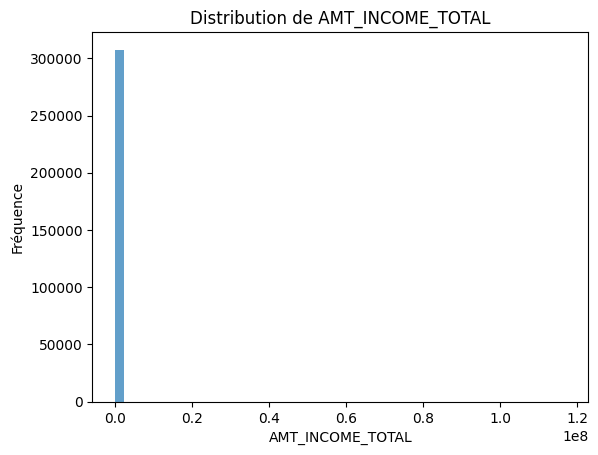

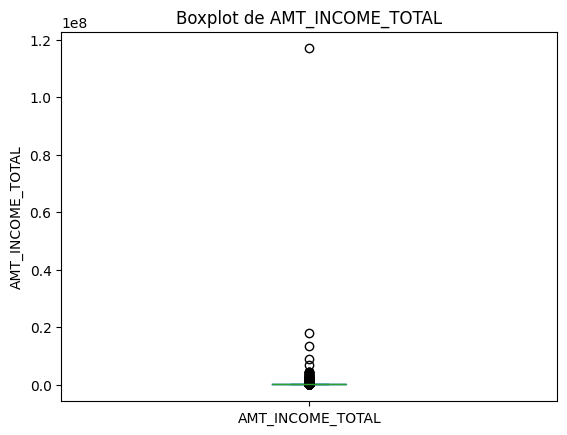

--- Analyse pour la variable : AMT_CREDIT ---
 - Moyenne : 599025.9997057016
 - Écart-type : 402490.77699585486
0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


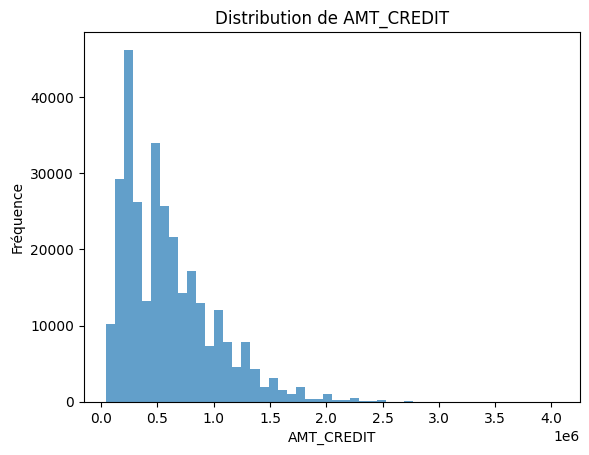

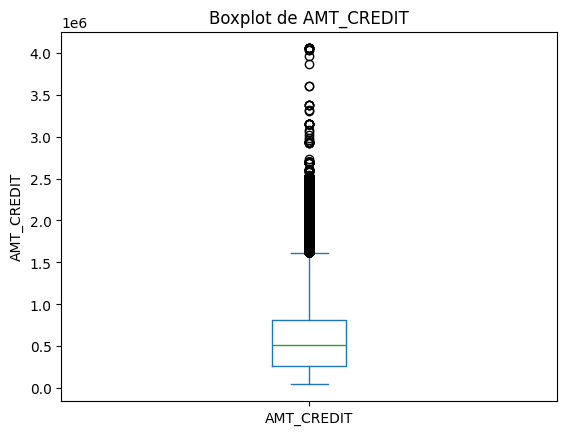

--- Analyse pour la variable : AMT_GOODS_PRICE ---
 - Moyenne : 538396.2074288895
 - Écart-type : 369446.46054005757
0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


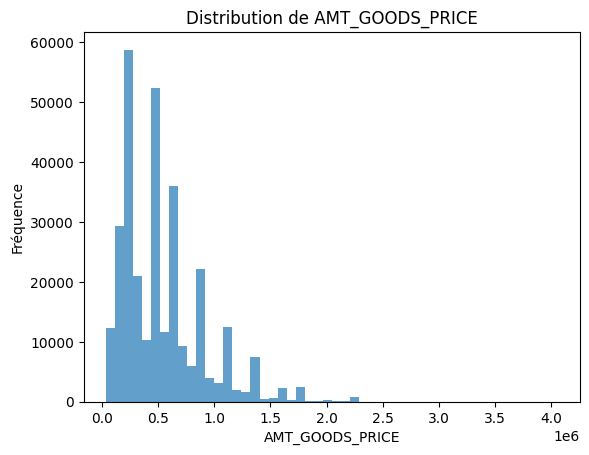

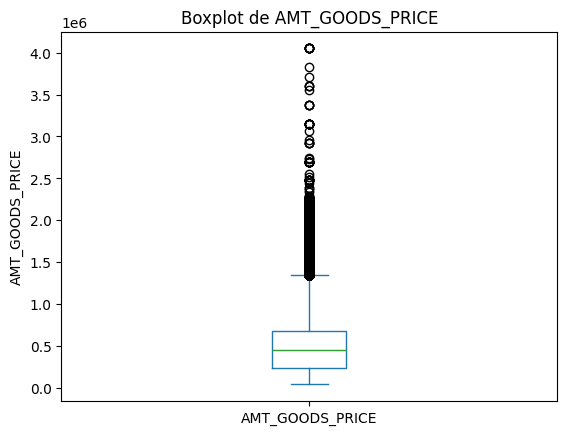

--- Analyse pour la variable : DAYS_BIRTH ---
 - Moyenne : -16036.995066843137
 - Écart-type : 4363.98863178556
0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


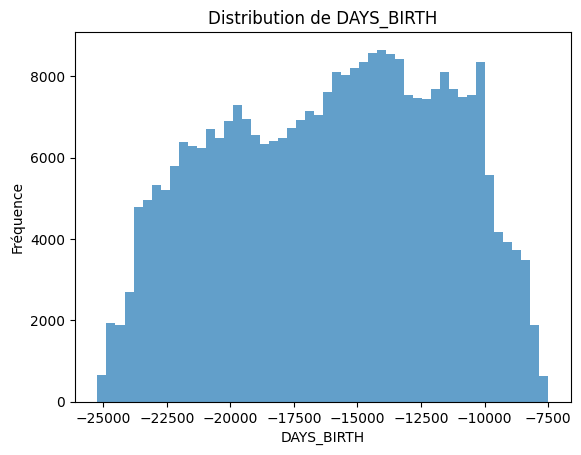

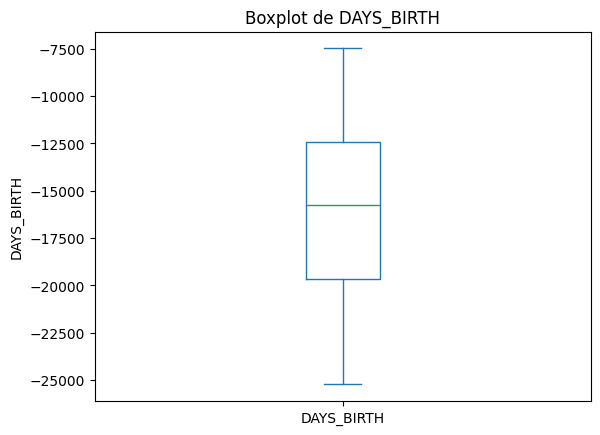

--- Analyse pour la variable : DAYS_EMPLOYED ---
 - Moyenne : 63815.04590404896
 - Écart-type : 141275.76651872724
0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


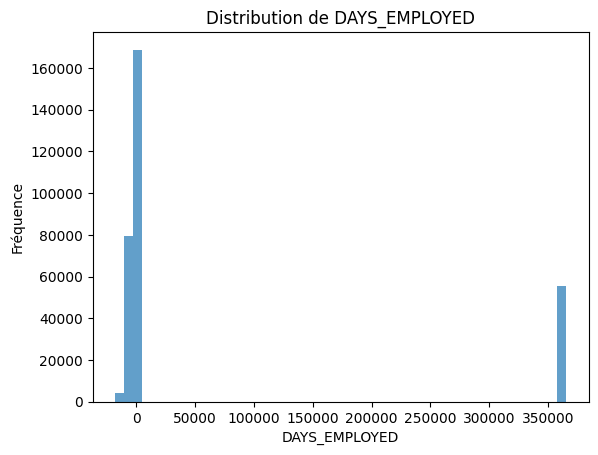

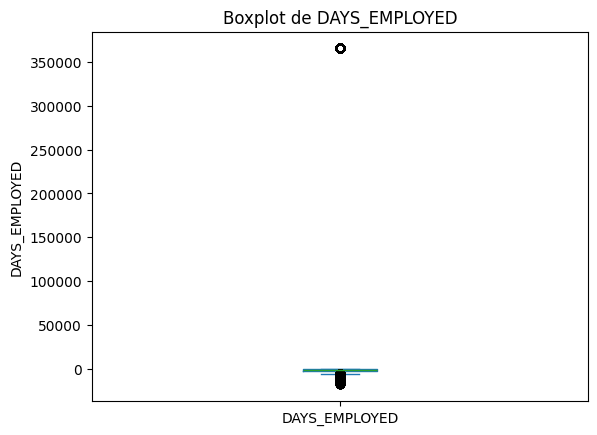

--- Analyse pour la variable : TOTALAREA_MODE ---
 - Moyenne : 0.10254666268544127
 - Écart-type : 0.10746232414961877
0     0.0149
1     0.0714
12    0.0612
13    0.1417
14    0.3811
Name: TOTALAREA_MODE, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


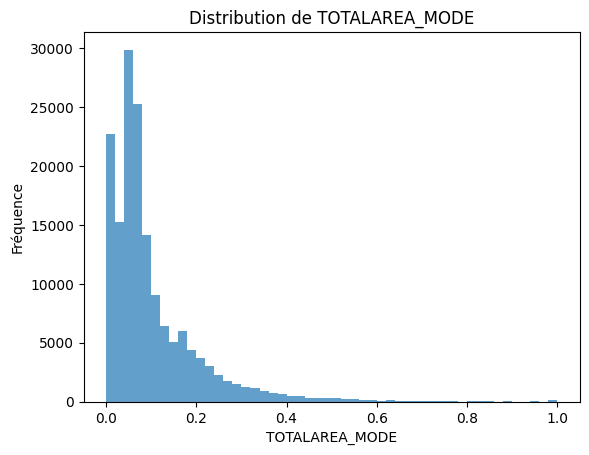

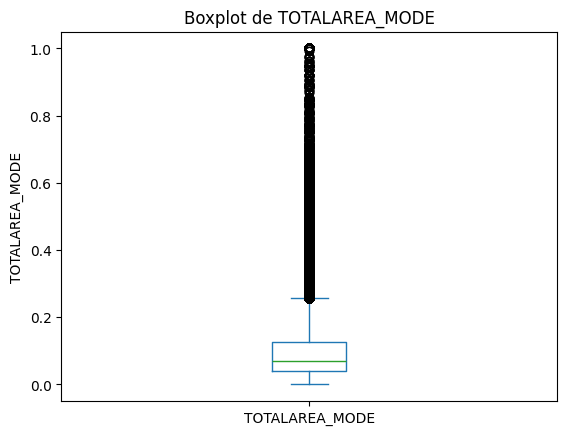

--- Analyse pour la variable : EXT_SOURCE_1 ---
 - Moyenne : 0.5021298056566625
 - Écart-type : 0.21106224927392492
0     0.083037
1     0.311267
6     0.774761
8     0.587334
10    0.319760
Name: EXT_SOURCE_1, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


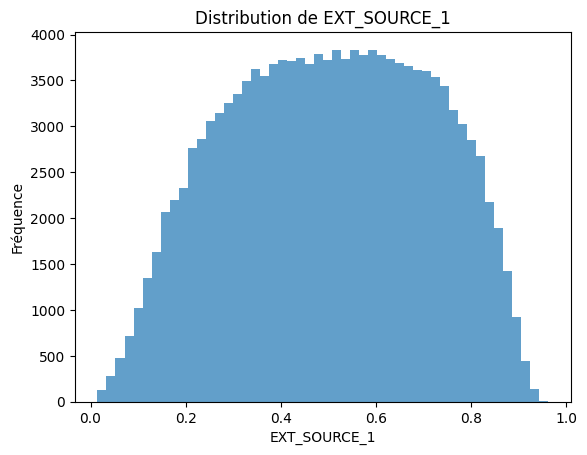

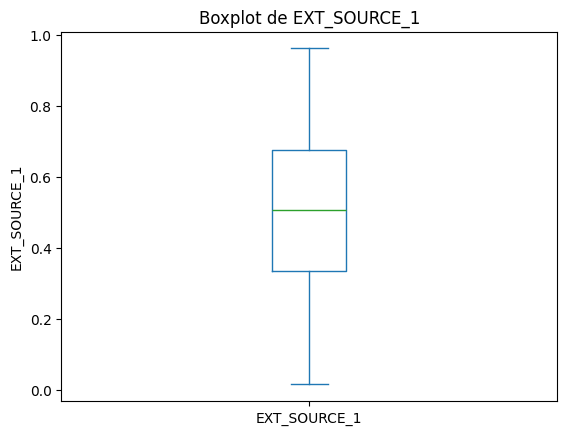

--- Analyse pour la variable : EXT_SOURCE_2 ---
 - Moyenne : 0.5143926741308462
 - Écart-type : 0.19106015498493653
0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


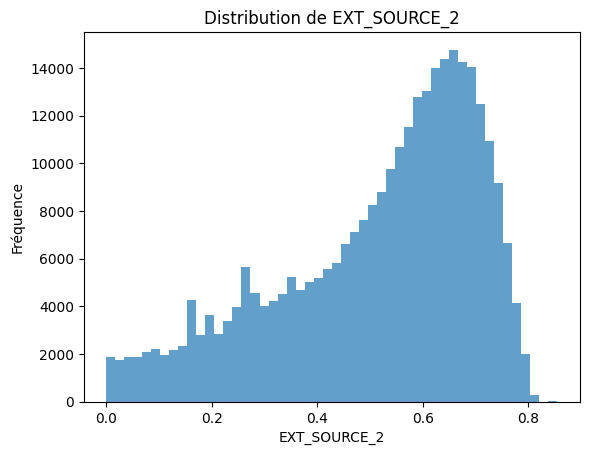

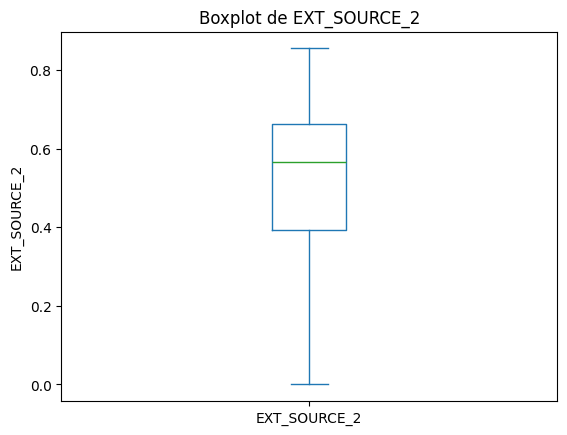

--- Analyse pour la variable : EXT_SOURCE_3 ---
 - Moyenne : 0.5108529061799658
 - Écart-type : 0.19484436446374884
0    0.139376
2    0.729567
5    0.621226
6    0.492060
7    0.540654
Name: EXT_SOURCE_3, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


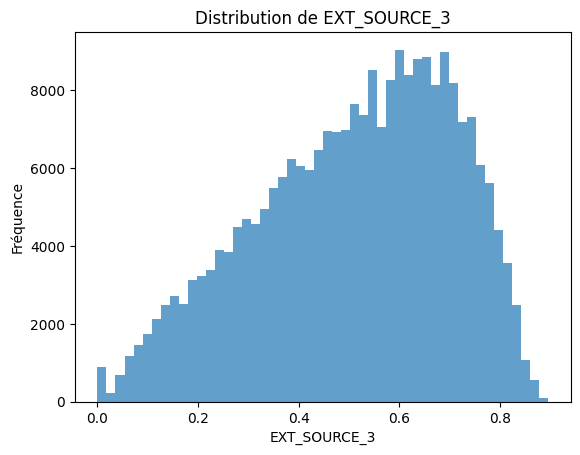

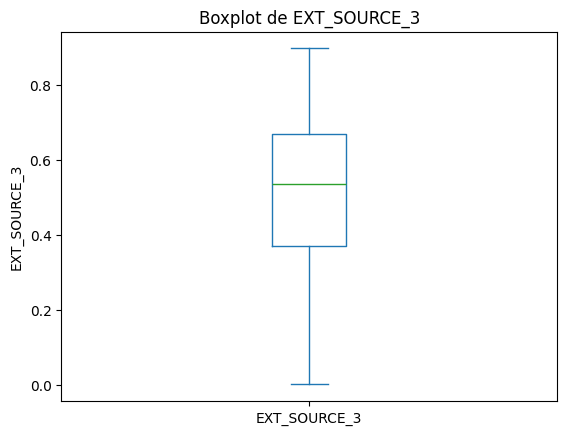

--- Analyse pour la variable : AMT_REQ_CREDIT_BUREAU_YEAR ---
 - Moyenne : 1.899974435321363
 - Écart-type : 1.869294998181557
0    1.0
1    0.0
2    0.0
4    0.0
5    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
Test de D’Agostino-Pearson : p-value = 0.0
   => Distribution non normale.


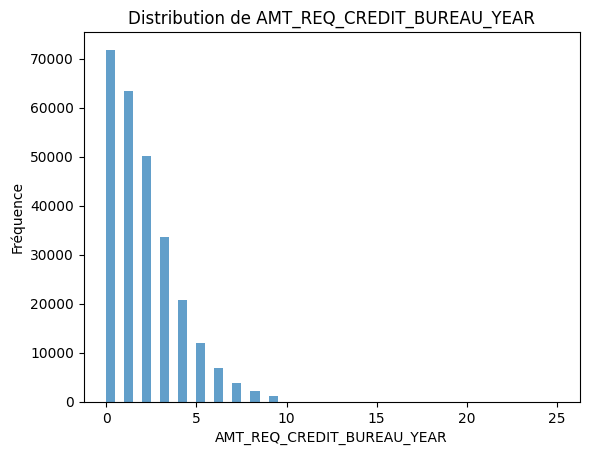

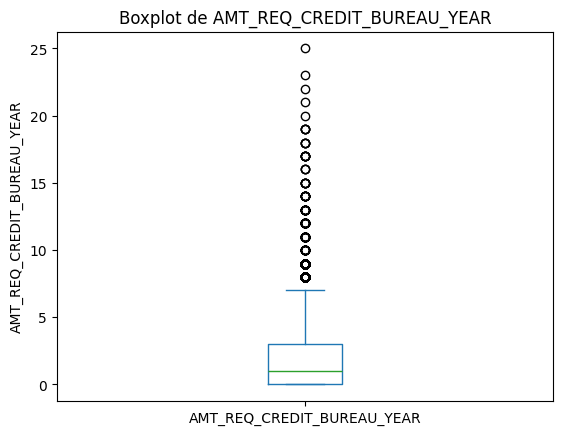

In [120]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest

# Obtenir le répertoire courant
script_dir = os.getcwd()

# Construire le chemin relatif
relative_path = os.path.join(script_dir, '../ressources_prof/client_credit_granting.csv')

# Charger les données
df = pd.read_csv(relative_path)

# Identifier les types de variables
categorical_vars = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'
]
binary_vars = ['GOOD_PAYER']
quantitative_vars = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'TOTALAREA_MODE',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Analyse univariée : variables quantitatives
for var in quantitative_vars:
    print(f'--- Analyse pour la variable : {var} ---')
    
    # Calculs descriptifs
    mean_val = df[var].mean()
    std_val = df[var].std()
    
    # Test de Shapiro-Wilk pour la normalité
    clean_data = df[var].dropna()  # Retirer les valeurs manquantes
    print(clean_data.head())
    stat, p_value = normaltest(clean_data)
    print(f'Test de D’Agostino-Pearson : p-value = {p_value}')
    if p_value < 0.05:
        print(f'   => Distribution non normale.')
    else:
        print(f'   => Distribution normale.')
    
    # Histogramme de la distribution
    df[var].plot(kind='hist', bins=50, title=f'Distribution de {var}', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

    # Boxplot de la variable
    df[var].plot(kind='box', title=f'Boxplot de {var}')
    plt.ylabel(var)
    plt.show()



- to do : 

Enlever les valeurs abérrantes : il y en a deux. 

retraiter les données, expliquer pourquoi on les a enlevé. Y'a des valeurs qui sontn très éloignées faut éventuellement les retraiter en les associant  à la valeur bonne 

puis on a fait un traitement sur les variables quantitatives, on continuera sur les varaibles catégorielles et les variables binaires.

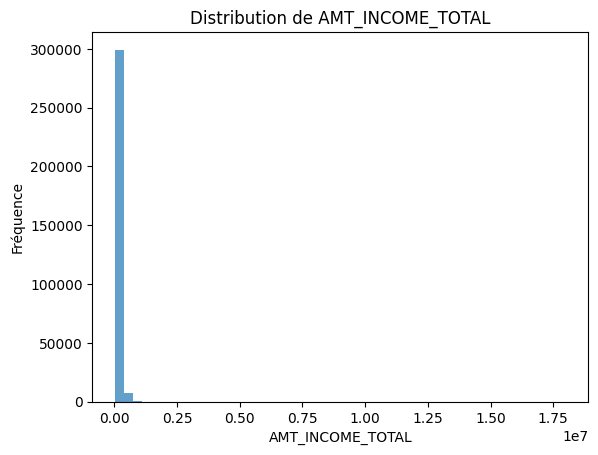

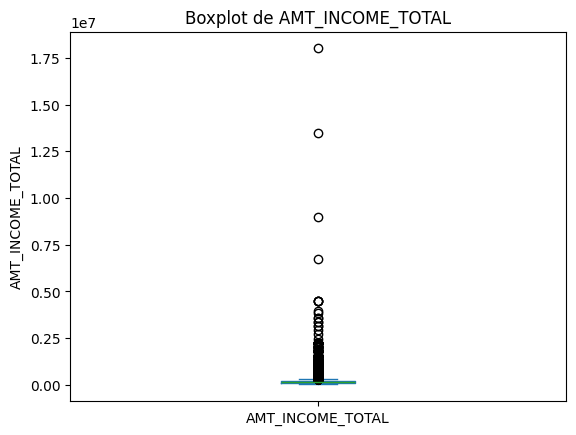

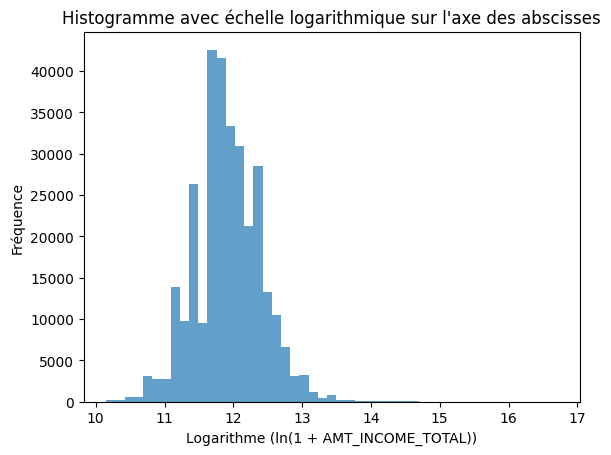

In [121]:
# retraitement : 

# ----------- valeur de AMT_INCOME_TOTAL : la plus haute valeur est abérrante. 

df = df[df["AMT_INCOME_TOTAL"] < 100_000_000]

# On va voir la nouvelle tete de la distribution et du boxplot une fois la valeur abérrante enlevée : 
for var in ["AMT_INCOME_TOTAL"]:
    
    df[var].plot(kind='hist', bins=50, title=f'Distribution de {var}', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

    # Boxplot de la variable
    df[var].plot(kind='box', title=f'Boxplot de {var}')
    plt.ylabel(var)
    plt.show()
# print("----------------\n\n---------------------\n\n")

# on a quand même des clients qui ont plusieurs millions et qui demandent des prêts. 
# Ils écraseent la disctribution et on a du mal à bien voir. On va faire un plot logarithmique.

# Appliquer le logarithme à l'axe des x pour mieux visualiser les données
df['LOG_AMT_INCOME_TOTAL'] = np.log1p(df['AMT_INCOME_TOTAL'])

# Créer un histogramme logarithmique
bins = np.linspace(df['LOG_AMT_INCOME_TOTAL'].min(), df['LOG_AMT_INCOME_TOTAL'].max(), 50)
plt.hist(df['LOG_AMT_INCOME_TOTAL'], bins=bins, alpha=0.7)

plt.title('Histogramme avec échelle logarithmique sur l\'axe des abscisses')
plt.xlabel('Logarithme (ln(1 + AMT_INCOME_TOTAL))')
plt.ylabel('Fréquence')
plt.show()



In [122]:
#prochain retraitement : DAYS_BIRTH. Toutes les valeurs sont négatives. Il faudrait qu'elles soient positives.

df["DAYS_BIRTH"] = df['DAYS_BIRTH'].map(lambda x: -x)

print(df['DAYS_BIRTH'])


0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307510, dtype: int64


0          637
1         1188
2          225
3         3039
4         3038
          ... 
307504    7258
307506     236
307508    7921
307509    4786
307510    1262
Name: DAYS_EMPLOYED, Length: 252136, dtype: int64


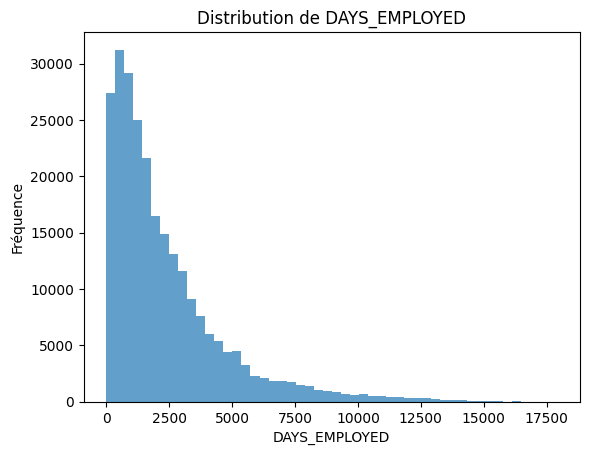

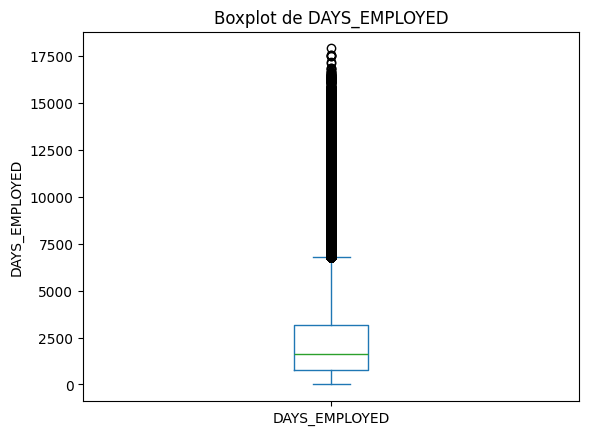

In [123]:
#prochain retraitement : DAYS_EMPLOYED
# 50 000 employés ont travaillé exactement 365 243 jours soit à peu près 1000 ans d'affilé. 
# C'est assez peu vraisemblable, donc on peut se permettre de supprimer ces valeurs.
#
# On a également certaines valeurs négatives... On va les conserver en les transformant en valeur positive.

df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"].map (lambda x: abs(x) )

df = df[ df["DAYS_EMPLOYED"] < 365_242]

print(df["DAYS_EMPLOYED"])

for var in ["DAYS_EMPLOYED"]:
    
    df[var].plot(kind='hist', bins=50, title=f'Distribution de {var}', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

    # Boxplot de la variable
    df[var].plot(kind='box', title=f'Boxplot de {var}')
    plt.ylabel(var)
    plt.show()




In [ ]:
# Faisons les variables 